![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def veryclose(a, b):
    return np.isclose(a, b, rtol=1e-12, atol=1e-12)

# Funcionário básico

In [144]:
def newton(f, df, x0, y, maxiter=100,  xtol=1e-12, ytol=1e-12):
    g = lambda x: f(x) - y
    pts = []
    pts.append(x0)
    while maxiter:
        x1 = x0 - g(x0)/df(x0)
        pts.append(x1)
        if abs(x1 - x0) <= xtol:
            return pts[-1]
        if abs(f(x1)) <= ytol:
            return pts[-1]
        x0 = x1
        maxiter -= 1
    return pts[-1]


In [145]:
assert veryclose(newton(np.sin, np.cos, 3, 0), np.pi)

In [146]:
x = newton(np.exp, np.exp, 0, 2)
assert veryclose(x, np.log(2))

In [147]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    integral = 0
    for pt in pts:
        integral += f(pt)*h
    return integral


# def retangulo(f, a, b, n=1000):
#     # YOUR CODE HERE
#     raise NotImplementedError()

def trap(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    integral = 0
    for i in range(1, len(pts)):
        integral += f(pts[i])*h
    integral += ((f(a)+f(b))*h)/2
    return integral

In [148]:
assert veryclose(retangulo(np.exp, 0, 1, n=10), 1.6337993999663625)

In [149]:
assert veryclose(trap(np.sin, 1, 2, n=33), 0.9563759511250488)

# Parte 1: Encontrando raízes de integrais

Nesta questão, vamos estudar o seguinte problema:
como encontrar o primeiro (segundo, n-ésimo) $x$ tal que

$$F(x) = \int_0^x \frac{\sin(\pi t)}{\pi t} \, dt = y.$$

## Questão 1: Primitiva

Escreva uma função `F(x)` que calcula esta primitiva pelo método do trapézio.

In [150]:
def F(x, n=1000):
    """Integral de  sin(pi t)/(pi t)  de 0 a  x."""

    return trap(np.sinc, 0, x, n)

In [151]:
assert F(0) == 0

In [152]:
assert veryclose(F(1), 0.5894897889027448)

In [153]:
assert veryclose(F(2, n=10), 0.4530876922149236)

## Questão 1: Gráficos

Faça um gráfico da função $\frac{\sin \pi t}{\pi t}$ no intervalo $[0, 4]$.

Essa função é conhecida no `numpy` (e na engenharia elétrica) como `np.sinc`.

Text(0.5, 1.0, 'Função Np.sinc')

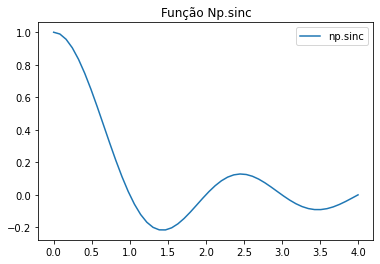

In [154]:

x = np.linspace(0, 4)
plt.plot(x, np.sinc(x), label="np.sinc")
plt.legend()
ax = plt.gca()
ax.set_title('Função Np.sinc')

In [155]:
assert len(ax.lines) == 1
assert ax.get_title() != ""

ys = ax.lines[0].get_ydata()
assert np.all(-0.22 <= ys) and np.all(ys <= 1)

In [156]:
ax = None

Se estiver tudo certo, a próxima caixa também não deve dar erro:

In [157]:
for n in range(1,1000):
    assert F(1, n=n) <= F(1, n=1+n)

Explique (com ajuda do gráfico acima) porque isto ocorre.

Isso acontece porque a função nesse intervalo tem uma característica decrescente, se desenharmos os trapézios sobre a função percebemos que a tendência é que a área deles subestime a área real. Assim, quando aumentamos o número de trapézios que utilizamos para estimar essa área (aumento do n), diminuímos o erro com a construção de trapézios de uma largura menor. Um erro menor significa que estamos nos aproximando mais da área real da função e, como vimos, a área real é maior do que a área que os trapézios costumem estimar.

## Questão 2: Estudando a primitiva

Faça também o gráfico da primitiva $F(x)$ no intervalo $[0, 4]$.

Não use pontos demais para não demorar demais ;-)

Text(0.5, 1.0, 'Primitiva')

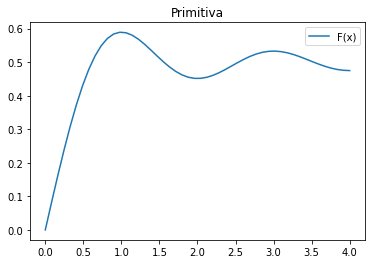

In [158]:
# YOUR CODE HERE
xs = np.linspace(0, 4)
ys = [F(x) for x in xs]
plt.plot(xs, ys, label="F(x)")
plt.legend()
ax = plt.gca()
ax.set_title('Primitiva')

In [159]:
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()
assert np.all(0 <= ys) and np.all(ys <= 0.6)

In [160]:
ax = None

Analisando este gráfico (e o anterior também),
deduza que a sequência $F(n+1) - F(n)$ (para $n$ inteiro positivo)
- converge para zero; e
- tem sinais alternados.

Essa função oscila e conforme x aumenta, suas oscilações vão ficando cada vez mais amenas. Por isso, F(n+1)-F(n) tende para zero e tem sinais alternados.

Mostre que o máximo de $F$ é atingido no ponto $x = 1$.

Qual é a importância deste valor para o nosso problema?

O máximo de F nos ajuda a determinar o ponto inicial de busca para a raiz. Como nenhum valor de F é maior que F(1), podemos proucurar a primeira raiz a esquerda desse valor. 

## Questão 3: Encontrando raízes

Se queremos encontrar um valor de $x$ tal que $F(x) = y$ pelo método de Newton,
precisamos

- da derivada da função $F$; e
- de um ponto inicial.

Explique qual derivada você usará para $F$.

A derivada da função F(x) é a própria função dentro da integral. 

$$F'(x) = \frac{\sin(\pi x)}{\pi x}$$

Qual ponto inicial faz sentido usar para encontrar **o primeiro $x$ tal que $F(x) = y$**?

Podemos utilizar um valor a esquerda do ponto máximo, pois sabemos que nesse sentido a função é decrescente e as tangentes nessa região vão nos guiar a raiz. Podemos então utilizar o x=0.5.

Faça uma função `primeira raiz` que calcule este $x$, dado $y$.

In [161]:
def primeira_raiz(y, n=1000):
    """Calcula a primeira raiz de F(x) = y,  usando  n  intervalos para aproximar o método do trapézio."""
    return newton(F, np.sinc, 0.5, y)

In [162]:
x_05 = primeira_raiz(0.5)
assert veryclose(F(x_05), 0.5)

In [163]:
assert np.isclose(x_05, 0.6132074231614169)

## Questão 4: Outras raízes

Alguns valores de $y$ podem aparecer várias vezes ao calcular a integral $F(x)$.

Quais são os valores de $y$ que podem ser atingidos pelo menos duas vezes?

Os valores de y entre o ponto máximo e o ponto mínimo local da nossa função, por causa do caráter oscilatório da função sabemos que valores de y nessa região podem se repetir.

Como você faria um método para encontrar esta segunda raiz de $F(x) = y$ para estes valores de $y$?

In [164]:
def segunda_raiz(y, n=1000):
    """Calcula a primeira raiz de F(x) = y,  usando  n  intervalos para aproximar o método do trapézio."""
    return newton(F, np.sinc, 1.1, y)

In [165]:
x_05_2 = segunda_raiz(0.5)
assert veryclose(F(x_05_2), 0.5)
assert x_05_2 > 1

In [166]:
x_055_2 = segunda_raiz(0.55)
assert veryclose(F(x_055_2), 0.55)
assert x_055_2 > 1

# Parte 2: Outro método para calcular a integral

Vamos usar 3 ideias que vimos para desenvolver um método de integração:
- o método deveria ser simétrico;
- o método deveria acertar o polinômio de maior grau possível;
- começamos estudando o método no intervalo simétrico $[-1,1]$.

## Questão 1: Dedução do método

Assim, considere um método que calcula a integral de uma função $f$ no intervalo $[-1,1]$,
usando dois pontos do **interior** do intervalo:

$$\int_{-1}^1 f(t) \, dt \simeq w_1 f(x_1) + w_2 f(x_2).$$

Deduza, da simetria, que $x_1 = -x_2$ e então que $w_1 = w_2$.

Se a função é simétrica, temos que essa integral, para esses limites de integração, é nula. Além disso, temos que $f(x_1) = f(-x_2) = -f(x_2)$. Assim,

$$ 0 \simeq -w_1f(x_2) + w_2f(x_2) $$


$$ w_1f(x_2) \simeq  w_2f(x_2) $$

$$ w_1  \simeq  w_2 $$

Calcule os pesos $w_1 = w_2$ para que a integral numérica acerte as constantes,
ou seja, que dê a resposta exata para $f(t) = c$.

Se f(t) = c,

$$2c \simeq c w_1  + c w_2$$

$$2 \simeq  w_1  +  w_2$$

$$ w_1 = w_2 \simeq  1$$


Enfim, calcule $x_1$ para que o lado direito acerte a função quadrática $f(t) = t^2$.

$$\int_{-1}^1 t^2 \, dt \simeq w_1 x^2_1 + w_2 x^2_2$$

$$ \frac{2}{3} \simeq w_1 x^2_1 + w_2 x^2_2$$

Se $$ w_1 = w_2 \simeq  1$$
$$ \frac{2}{3} \simeq  x^2_1 +  x^2_2$$

Se  $x_1 = -x_2$

$$ \frac{2}{3} \simeq  x^2_1 +  x^2_1$$


$$ x_1 = \pm \frac{1}{\sqrt{3}}$$

## Questão 2: Implementação

Escreva o método `sym2` que usa os 2 pontos simétricos deduzidos acima,
em cada um dos `n` sub-intervalos em que será dividido o intervalo $[a,b]$.

In [167]:
def sym2(f, a, b, n=1000):
    """Método de integração usando 2 pontos interiors simétricos, com  n  subdivisões."""
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    # YOUR CODE HERE
    raise NotImplementedError()

In [168]:
assert veryclose(sym2(np.exp, 0, 1), np.exp(1) - 1)

NotImplementedError: 

In [ ]:
assert veryclose(sym2(np.sin, 0, np.pi), 2)

In [ ]:
v = sym2(np.sin, 0, np.pi, n=100)
assert     np.isclose(v, 2, rtol=1e-8,  atol=1e-8)
assert not np.isclose(v, 2, atol=1e-10, rtol=1e-10)

In [ ]:
def invsqr(x):
    return 1/np.sqrt(x)

assert veryclose(sym2(invsqr, 1, 2), 2*(np.sqrt(2) - 1))

## Questão 3: Decaimento dos erros

Faça um gráfico do erro de integração, ao aumentar o número de subdivisões, para
- $\int_0^\pi \sin(t) \, dt$;
- $\int_0^1 \exp(t) \, dt$;
- $\int_1^2 \frac{1}{\sqrt{t}} dt$.

In [ ]:
ns = np.logspace(1, 15, dtype=int, base=2, num=29)

# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [ ]:
ax = None

O que você percebe neste gráfico?  Quão rápido decresce o erro?

YOUR ANSWER HERE

## Questão 4: Integrais com infinitos

Agora, vamos testar algo muito mais audaz:

$$\int_0^1 \frac{dt}{\sqrt{t}},$$

que é uma integral dita "imprópria";
neste caso porque o integrando não está definido (ou "vale infinito")
para uma das extremidades.

Como o método usa pontos no interior do intervalo,
ele não precisará calcular $f(0)$, que não está bem-definida.

Faça o gráfico do erro de integração, conforme $n$ aumenta,
usando `sym2`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 1

In [ ]:
assert 0.1 <= max(ax.lines[0].get_ydata()) <= 1

In [ ]:
ax = None

Qual a velocidade de decaimento do erro?  Ou seja, ao fazer 10 vezes mais intervalos, quanto parece diminuir o erro?

YOUR ANSWER HERE

## Questão 5: Outro método

Também poderíamos aplicar é o método do retângulo "do outro lado",
calculando a integral de 1 até 0 (e trocando o sinal),
que também vai "driblar" a singularidade.

Verifique que o seu método do retângulo de fato troca de sinal
quando calcula uma integral "ao contrário", de $1$ até $0$:

In [ ]:
retangulo(invsqr, 1, 0)

Faça o gráfico do erro cometido pelo método do retângulo
ao aproximar a integral $\int_0^1 t^{-1/2} \, dt$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 1

In [ ]:
assert 0.1 <= max(ax.lines[0].get_ydata()) <= 1

In [ ]:
ax = None

Qual a velocidade com que este erro decai?  Como este erro se compara com o anterior?

YOUR ANSWER HERE

## Questão 6 (Bônus): Análise final

Qual o erro de integração do primeiro intervalo $[0, h]$, em cada um dos métodos?

Dê a resposta exata, em função de $h$, calculando analiticamente a primitiva,
e os valores retornados pelas funções.

YOUR ANSWER HERE

Estes cálculos explicam o erro que você observou?

YOUR ANSWER HERE